# **ANALYSIS OF FINANCIAL INCLUSION IN EAST AFRICA BETWEEN 2016 TO 2018**

##DEFINING QUESTION

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.

### METRIC FOR SUCCESS

 My solution procedure will be to help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals financial outcomes.

###THE CONTEXT

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### EXPERIMENTAL DESIGN TAKEN

The procedure taken is:
1. Definition of the question
2. Reading and checking of the data
3. External data source validation
4. Cleaning of the dataset
5. Exploratory analysis


### DATA RELEVANCE


Data to be used contains demographic information and what financial services are used by individuals in East Africa. The data is extracted from various Finsscope surveys and is ranging from 2016 to 2018. The data files include:

Variable Definitions: http://bit.ly/VariableDefinitions

Dataset: http://bit.ly/FinancialDataset

FinAccess Kenya 2018: https://fsdkenya.org/publication/finaccess2019/

Finscope Rwanda 2016: http://www.statistics.gov.rw/publication/finscope-rwanda-2016 

Finscope Tanzania 2017: http://www.fsdt.or.tz/finscope/

Finscope Uganda 2018: http://fsduganda.or.ug/finscope-2018-survey-report/

This data is relevant in this project since it provides important insights that will help in solving the research question.

## LOADING LIBRARIES

In [132]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## READING AND CHECKING DATA

In [133]:
# loading and viewing variable definitions dataset

url = "http://bit.ly/VariableDefinitions"
vb_df = pd.read_csv(url)
vb_df

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [134]:
# loading and viewing financial dataset
url2 = "http://bit.ly/FinancialDataset"
fds = pd.read_csv(url2)
fds

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [135]:
fds.shape

(23524, 13)

In [136]:
fds.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [137]:
fds.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [138]:
fds.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [139]:
fds.columns


Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [140]:
fds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [141]:
fds.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [142]:
fds.describe(include=object)

,country,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524,23488,23509,23513,23490,23520,23492,23495,23494
unique,4,8735,2,2,2,2,6,5,7,10
top,Rwanda,uniqueid_1464,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20179,14338,17449,13859,12829,10739,12775,6428


In [143]:
len(fds)

23524

In [144]:
fds.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [145]:
fds.count()

country                   23510
year                      23524
uniqueid                  23524
Has a Bank account        23488
Type of Location          23509
Cell Phone Access         23513
household_size            23496
Respondent Age            23490
gender_of_respondent      23490
The relathip with head    23520
marital_status            23492
Level of Educuation       23495
Type of Job               23494
dtype: int64

## EXTERNAL DATA SOURCE VALIDATION


FinAccess Kenya 2018: https://fsdkenya.org/publication/finaccess2019/

Finscope Rwanda 2016: http://www.statistics.gov.rw/publication/finscope-rwanda-2016 

Finscope Tanzania 2017: http://www.fsdt.or.tz/finscope/

Finscope Uganda 2018: http://fsduganda.or.ug/finscope-2018-survey-report/

## CLEANING THE DATASET

In [146]:
fds.head(2)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


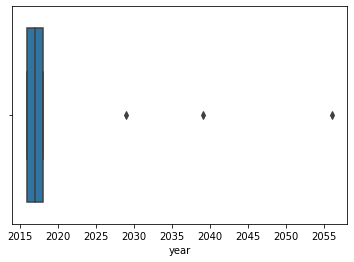

In [147]:
# CHECKING FOR OUTLIERS IN YEAR COLUMN

sns.boxplot(x=fds['year'])


In [148]:
fds.shape

(23524, 13)

In [149]:
# dropping year column outliers
fds1= fds[fds['year']<2020]
             
fds1.shape   

(23521, 13)

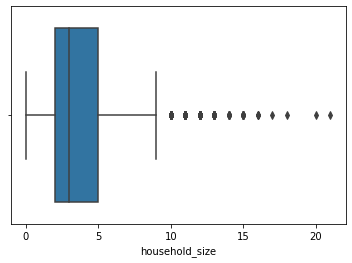

In [150]:
# CHECKING FOR OUTLIERS IN HOUSEHOLD SIZE COLUMN

sns.boxplot(x=fds1['household_size'])

In [151]:
# dropping household size outliers
fds2 =fds1[fds1['household_size']<10]
fds2.shape

(23116, 13)

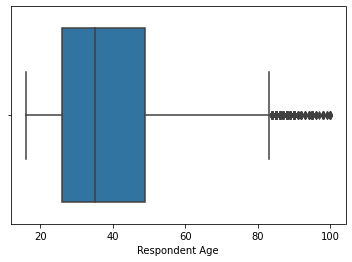

In [152]:
# CHECKING FOR OUTLIERS IN AGE OF RESPONDENT
sns.boxplot(x=fds2['Respondent Age'])

In [153]:
# dropping age of respondent outliers

fds3 = fds2[fds2['Respondent Age']<82]
fds3.shape

(22775, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


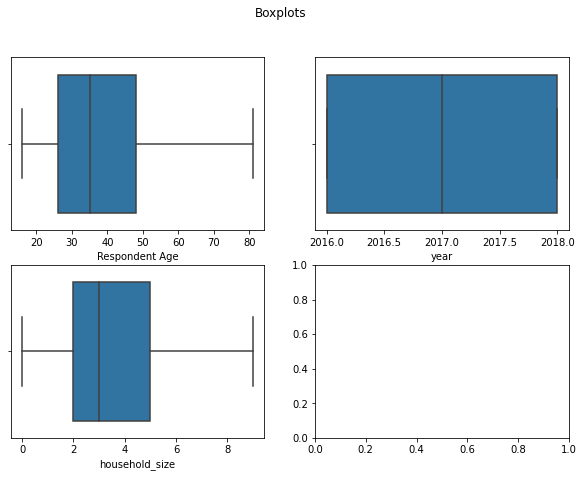

In [154]:
# plotting the final boxplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(fds3['Respondent Age'], ax=ax1)
sns.boxplot(fds3['year'], ax=ax2)
sns.boxplot(fds3['household_size'], ax=ax3)

plt.show()

# the outliers have finally been droppped

In [155]:
# CHECKING FOR NULLL OR MISSING DATA 
fds3.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        33
Type of Location          14
Cell Phone Access         10
household_size             0
Respondent Age             0
gender_of_respondent      26
The relathip with head     0
marital_status            26
Level of Educuation       25
Type of Job               26
dtype: int64

In [156]:
# dropping nulls 
fds4 = fds3.dropna()
fds4.shape

(22652, 13)

In [228]:
# dropping duplicates
fds4.drop_duplicates().head(2)


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [158]:
# changing column names and columns to lowercase
#for columns in fds.columns:
  #fds1[columns] = fds[columns].astype(str).str.lower()
#fds1

#fds1.rename(columns=str.lower)
# renaming columns

fds5 = fds4.rename(columns={'Type of Location':'location_type', 'Has a Bank account' : 'bank account','Cell Phone Access':'cellphone_access', 'Respondent Age': 'age_of_respondent',
                           'The relathip with head': 'relationship_with_head', 'Level of Educuation' : 'education_level', 'Type of Job': 'job_type'})

fds5.head(2)

,country,year,uniqueid,bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [159]:
fds5.shape

(22652, 13)

In [160]:
fds5.size

294476

In [161]:
fds5.nunique()

country                      4
year                         3
uniqueid                  8641
bank account                 2
location_type                2
cellphone_access             2
household_size              10
age_of_respondent           66
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              7
job_type                    10
dtype: int64

In [162]:
fds5['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [163]:
fds5['year'].unique()

array([2018, 2016, 2017])

In [164]:
fds5['bank account'].unique()

array(['Yes', 'No'], dtype=object)

In [165]:
fds5['location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [166]:
fds5['cellphone_access'].unique()

array(['Yes', 'No'], dtype=object)

In [167]:
fds5['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

In [168]:
fds5.drop(fds5.loc[fds5['education_level'] ==6].index, inplace=True)

In [169]:
fds5['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

In [170]:
fds5['gender_of_respondent'].unique()

array(['Female', 'Male'], dtype=object)

In [171]:
fds5['household_size'].unique()

array([3., 5., 8., 7., 1., 6., 4., 2., 9., 0.])

In [172]:
fds5.drop(fds5.loc[fds5['household_size'] == 0].index, inplace=True)

In [173]:
fds5['household_size'].unique()

array([3., 5., 8., 7., 1., 6., 4., 2., 9.])

In [174]:
fds5['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [175]:
fds5['relationship_with_head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [176]:
fds5['age_of_respondent'].unique()

array([24., 70., 26., 34., 32., 42., 54., 76., 40., 69., 64., 31., 38.,
       47., 27., 48., 25., 21., 18., 22., 58., 55., 62., 29., 35., 45.,
       67., 19., 80., 66., 50., 33., 28., 51., 16., 17., 30., 37., 59.,
       65., 46., 56., 52., 43., 49., 44., 72., 53., 63., 39., 81., 78.,
       36., 20., 60., 23., 71., 57., 68., 41., 61., 75., 73., 74., 77.,
       79.])

## **EXPLORATORY ANALYSIS**

### 1.UNIVARIATE ANALYSIS

#### a. NUMERICAL VARIABLES

##### MODE


In [177]:

fds5['year'].mode()

0    2016
dtype: int64

In [178]:
fds5['household_size'].mode()

0    2.0
dtype: float64

In [179]:
fds5['age_of_respondent'].mode()

0    30.0
dtype: float64

##### MEAN

In [180]:
fds5['age_of_respondent'].mean()

38.19774585635359

In [181]:
fds5['household_size'].mean()

3.5884198895027626

In [182]:
fds5.mean()

year                 2016.968398
household_size          3.588420
age_of_respondent      38.197746
dtype: float64

##### MEDIAN

In [183]:
fds5['age_of_respondent'].median()

35.0

In [184]:
fds5['household_size'].median()

3.0

In [185]:
fds5.median()

year                 2017.0
household_size          3.0
age_of_respondent      35.0
dtype: float64

##### RANGE

In [186]:
a = fds5['age_of_respondent'].max()
b = fds5['age_of_respondent'].min()

c = a-b
print('The range of the age for the respondents is', c)

The range of the age for the respondents is 65.0


In [187]:
d = fds5['household_size'].max()
e = fds5['household_size'].min()

f = d-e
print('The range of the household_sizes is', f)

The range of the household_sizes is 8.0


##### QUANTILE AND INTERQUANTILE

In [188]:
fds5.quantile([0.25,0.5,0.75])

,year,household_size,age_of_respondent
0.25,2016.0,2.0,26.0
0.50,2017.0,3.0,35.0
0.75,2018.0,5.0,48.0


In [189]:
# FINDING THE INTERQUANTILE RANGE = IQR
Q3 = fds5['age_of_respondent'].quantile(0.75)
Q2 = fds5['age_of_respondent'].quantile(0.25)
IQR= Q3-Q2
print('The IQR for the respondents age is', IQR)

The IQR for the respondents age is 22.0


In [190]:
q3 = fds5['household_size'].quantile(0.75)
q2 = fds5['household_size'].quantile(0.25)
iqr = q3-q2
print('The IQR for household sizes is', iqr)

The IQR for household sizes is 3.0


##### STANDARD DEVIATION

In [191]:
fds5.std()

year                  0.846941
household_size        2.078309
age_of_respondent    15.620269
dtype: float64

##### VARIANCE

In [192]:
fds5.var()

year                   0.717309
household_size         4.319367
age_of_respondent    243.992808
dtype: float64

##### KURTOSIS

In [193]:
fds5.kurt()

year                -1.603392
household_size      -0.509947
age_of_respondent   -0.279580
dtype: float64

##### SKEWNESS

In [194]:
fds5.skew()

year                 0.059977
household_size       0.605740
age_of_respondent    0.722808
dtype: float64

#### b. CATEGORICAL

##### MODE


In [195]:
fds5.mode().head(1)

,country,year,uniqueid,bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Rwanda,2016.0,uniqueid_1,No,Rural,Yes,2.0,30.0,Female,Head of Household,Married/Living together,Primary education,Self employed


Text(0.5, 1.0, ' Frequency of the ages of the respondents')

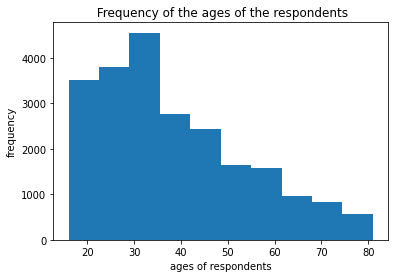

In [196]:
fds5['age_of_respondent'].plot(kind="hist")
plt.xlabel('ages of respondents')
plt.ylabel('frequency')
plt.title(' Frequency of the ages of the respondents')

Rwanda      8483
Tanzania    6374
Kenya       5848
Uganda      1920
Name: country, dtype: int64


Text(0.5, 1.0, 'Distribution of the respondents by country')

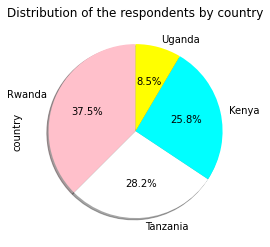

In [197]:
country=fds5['country'].value_counts()
print(country)

# Plotting the pie chart
colors=['pink','white','cyan','yellow']
country.plot(kind='pie',colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Distribution of the respondents by country')

Text(0.5, 1.0, 'availability of bank accounts')

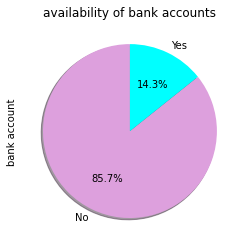

In [198]:
bank =fds5['bank account'].value_counts()

# Plotting the pie chart
colors=['plum', 'aqua']
bank.plot(kind='pie',colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('availability of bank accounts')

Text(0.5, 1.0, 'Distribution of the respondents according to location')

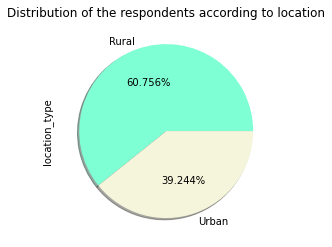

In [199]:
location=fds5['location_type'].value_counts()

# Plotting the pie chart
colors=['aquamarine','beige']
location.plot(kind='pie',colors=colors,autopct='%1.3f%%',shadow=True,startangle=00)
plt.title('Distribution of the respondents according to location')

Text(0.5, 1.0, 'cellphone access for the respondents')

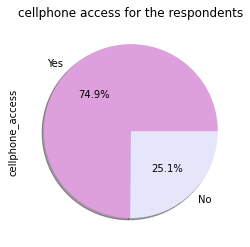

In [200]:
celly =fds5['cellphone_access'].value_counts()

# Plotting the pie chart
colors=['plum','lavender']
celly.plot(kind='pie',colors=colors,autopct='%1.1f%%',shadow=True,startangle=0)
plt.title('cellphone access for the respondents')

Text(0.5, 1.0, 'gender distribution')

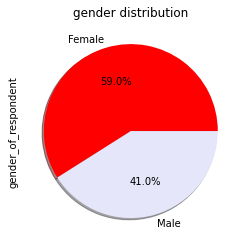

In [201]:
gen =fds5['gender_of_respondent'].value_counts()

# Plotting the pie chart
colors=['red','lavender']
gen.plot(kind='pie',colors=colors,autopct='%1.1f%%',shadow=True,startangle=0)
plt.title('gender distribution')

##### CONCLUSION AND RECOMMENDATION

Most of the data was collected in Rwanda.
Most of the data was collected in Rural areas.
Most of those who were interviewed were women.
Most of the population has mobile phones.
There were several outliers.

Since 75% of the population has phones, phones should be used as the main channel for information and awareness of bank accessories.


### 2. BIVARIATE ANALYSIS

In [202]:
fds5.head()

,country,year,uniqueid,bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [203]:
#@title Since i am predicting the likelihood of the respondents using the bank,I shall be comparing all variables against the bank account column.


##### NUMERICAL VS NUMERICAL

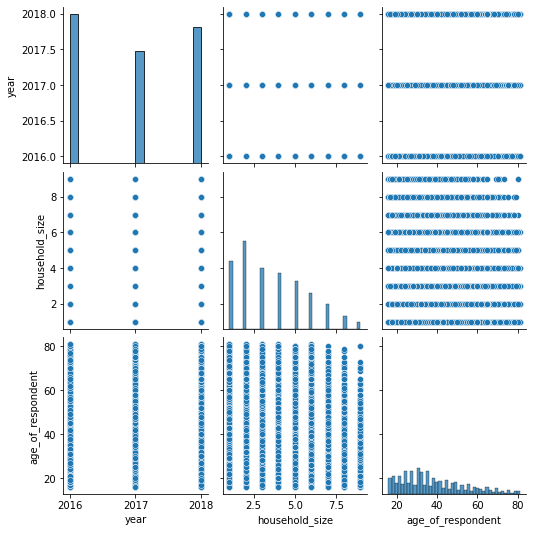

In [204]:
sns.pairplot(fds5)
plt.show()

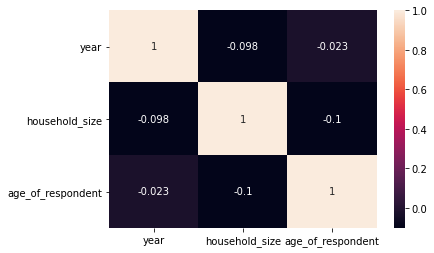

In [226]:
# pearson correlation of numerical variables

sns.heatmap(fds5.corr(),annot=True)
plt.show()

# possible weak correlation

In [206]:
fds5.corr()

,year,household_size,age_of_respondent
year,1.000000,-0.097639,-0.023079
household_size,-0.097639,1.000000,-0.101308
age_of_respondent,-0.023079,-0.101308,1.000000


##### CATEGORICAL VS CATEGORICAL

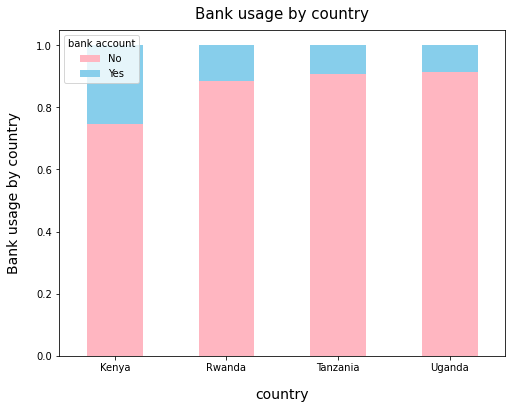

In [207]:
# Grouping bank usage by country
country1 = fds5.groupby('country')['bank account'].value_counts(normalize=True).unstack()

colors= ['lightpink', 'skyblue']

country1.plot(kind='bar', figsize=(8, 6), color=colors, stacked=True)
plt.title('Bank usage by country', fontsize=15, y=1.015)
plt.xlabel('country', fontsize=14, labelpad=15)
plt.xticks(rotation = 360)
plt.ylabel('Bank usage by country', fontsize=14, labelpad=15)

plt.show()

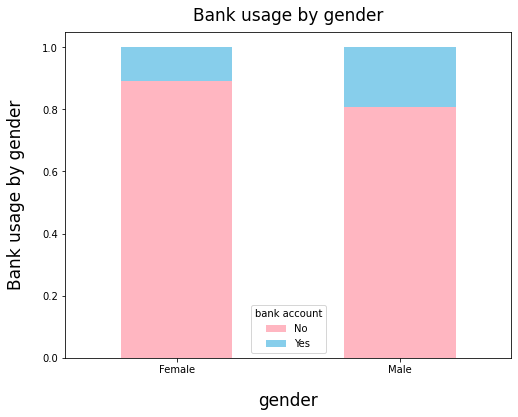

In [208]:
# Bank usage by gender
gender1 = fds5.groupby('gender_of_respondent')['bank account'].value_counts(normalize=True).unstack()

colors= ['lightpink', 'skyblue']

gender1.plot(kind='bar', figsize=(8, 6), color=colors, stacked=True)
plt.title('Bank usage by gender', fontsize=17, y=1.015)
plt.xlabel('gender', fontsize=17, labelpad=17)
plt.xticks(rotation = 360)
plt.ylabel('Bank usage by gender', fontsize=17, labelpad=17)

plt.show()

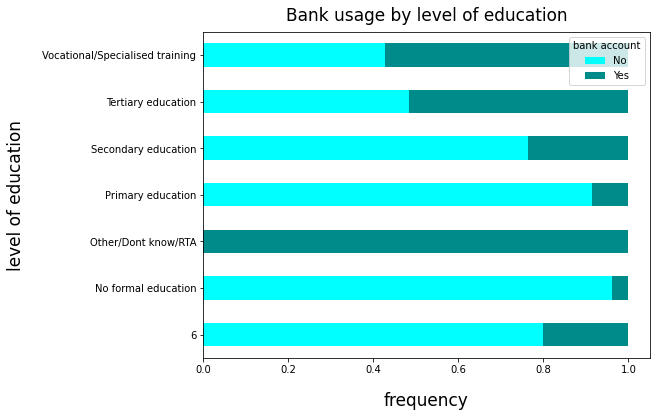

In [209]:
# Bank usage depending on level of education

ed2 = fds5.groupby('education_level')['bank account'].value_counts(normalize=True).unstack()

colors= ['cyan', 'darkcyan']

ed2.plot(kind='barh', figsize=(8, 6), color=colors, stacked=True)
plt.title('Bank usage by level of education', fontsize=17, y=1.015)
plt.xlabel('frequency', fontsize=17, labelpad=17)
plt.xticks(rotation = 360)
plt.ylabel('level of education', fontsize=17, labelpad=17)

plt.show()

Text(0, 0.5, 'marital status')

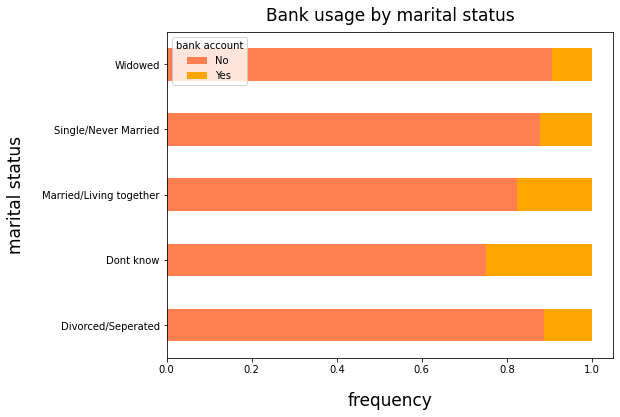

In [210]:



ms = fds5.groupby('marital_status')['bank account'].value_counts(normalize=True).unstack()

colors= ['coral', 'orange']

ms.plot(kind='barh', figsize=(8, 6), color=colors, stacked=True)
plt.title('Bank usage by marital status', fontsize=17, y=1.015)
plt.xlabel('frequency', fontsize=17, labelpad=17)
plt.xticks(rotation = 360)
plt.ylabel('marital status', fontsize=17, labelpad=17)

Text(0, 0.5, 'job type')

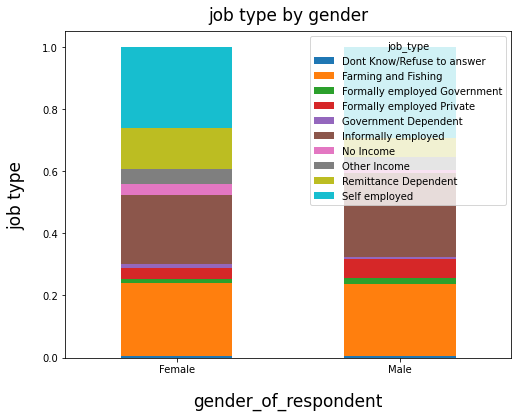

In [211]:

gj = fds5.groupby('gender_of_respondent')['job_type'].value_counts(normalize=True).unstack()

#colors= ['coral', 'orange']

gj.plot(kind='bar', figsize=(8, 6), stacked=True)
plt.title('job type by gender', fontsize=17, y=1.015)
plt.xlabel('gender_of_respondent', fontsize=17, labelpad=17)
plt.xticks(rotation = 360)
plt.ylabel('job type', fontsize=17, labelpad=17)

##### NUMERICAL VS CATEGORICAL

##### IMPLEMENTING AND CHALLENGING SOLUTION

Most of those interviewed do not have bank accounts of which 80% is the uneducated.
Most of the population that participated is married,followed by single/never married.
Most of the population has primary school education level.
Most of the population is involved in farming followed by self employment.
Bank usage has more males than females.


More channeling needs to be done in Kenya as it has the least bank users.

###3. MULTIVARIATE ANALYSIS

In [212]:
# Multivariate analysis - This is a statistical analysis that involves observation and analysis of more than one statistical outcome variable at a time


In [213]:
# LETS MAKE A COPY
fds_new = fds5.copy()

In [214]:
fds_new.columns

Index(['country', 'year', 'uniqueid', 'bank account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [215]:
fds_new.dtypes

country                    object
year                        int64
uniqueid                   object
bank account               object
location_type              object
cellphone_access           object
household_size            float64
age_of_respondent         float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
education_level            object
job_type                   object
dtype: object

In [216]:
# IMPORTING THE LABEL ENCODER

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# encoding categorial values

fds_new['country']=le.fit_transform(fds_new['country'].astype(str))

fds_new['location_type']=le.fit_transform(fds_new['location_type'].astype(str))

fds_new['cellphone_access']=le.fit_transform(fds_new['cellphone_access'].astype(str))

fds_new['gender_of_respondent']=le.fit_transform(fds_new['gender_of_respondent'].astype(str))

fds_new['relationship_with_head']=le.fit_transform(fds_new['relationship_with_head'].astype(str))

fds_new['marital_status']=le.fit_transform(fds_new['marital_status'].astype(str))

fds_new['education_level']=le.fit_transform(fds_new['education_level'].astype(str))

fds_new['job_type']=le.fit_transform(fds_new['job_type'].astype(str))

In [217]:
fds_new.sample(5)

,country,year,uniqueid,bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
20348,2,2017,uniqueid_5546,No,1,0,2.0,51.0,0,5,3,1,9
14592,1,2016,uniqueid_8525,No,0,1,6.0,41.0,0,1,4,3,5
6001,0,2018,uniqueid_6002,No,1,1,1.0,22.0,0,1,3,6,8
8943,1,2016,uniqueid_2876,No,1,1,7.0,16.0,1,0,3,4,8
1492,0,2018,uniqueid_1493,No,0,0,6.0,18.0,0,3,3,4,8


In [218]:
# dropping unnecessary columns
fds_new.drop(['age_of_respondent','uniqueid','year'], axis=1).head(2)

,country,bank account,location_type,cellphone_access,household_size,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,Yes,0,1,3.0,0,5,2,4,9
1,0,No,0,0,5.0,0,1,4,1,4


##### FACTOR ANALYSIS

In [219]:

# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(fds_new)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(30332.342997119944, 0.0)

In [220]:
# Value of KMO less than 0.6 is considered inadequate.
# 
#from factor_analyzer.factor_analyzer import calculate_kmo

#kmo_all,kmo_model=calculate_kmo(fds_new)
#calculate_kmo(fds_new)

In [221]:
# Choosing the Number of Factors
 
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(fds_new, 10, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# We choose the factors that are > 1.
# so we choose 4 factors only

,Original_Eigenvalues
0,1.995649
1,1.647505
2,1.554754
3,1.123652
4,0.964941
5,0.826158
6,0.758192
7,0.665986
8,0.573955
9,0.468287


In [225]:
# PERFOMING FACTOR ANALYSIS FOR 4 FACTORS
fa = FactorAnalyzer()

fa.analyze(fds_new, 4, rotation="varimax")
fa.loadings


,Factor1,Factor2,Factor3,Factor4
country,0.161769,0.054840,-0.016936,0.983273
year,0.442836,0.013671,0.085787,-0.171530
location_type,0.606414,0.007049,-0.000123,0.067402
cellphone_access,-0.154779,-0.132362,0.303874,-0.120444
household_size,-0.380170,0.065460,0.170697,-0.137733
age_of_respondent,-0.068456,-0.079196,-0.522817,-0.069130
gender_of_respondent,-0.014558,-0.537199,0.115705,0.008290
relationship_with_head,-0.030066,0.915872,0.177453,0.080188
marital_status,0.111824,-0.045837,-0.324910,-0.012025
education_level,0.218677,-0.133736,0.616317,-0.092924


In [223]:
# GETTING VARIANCE FOR THE FACTORS
fa.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,1.312726,1.283969,0.972960
Proportion Var,0.119339,0.116724,0.088451
Cumulative Var,0.119339,0.236063,0.324514


##### CONCLUSION


The reduction method used was factor analysis.
Four factors had an eigen value greater than 1.


##### CHALLENGING SOLUTION

There is room for modification because there are other methodologies that could be used for analysis. 
There is also an assumption that this data is accurate to the real world.